In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib as pl
%matplotlib inline

In [6]:
df1=pd.read_csv("C:/Somduity/Python/wdbc.csv")
df1.head()

,ID number,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimesion
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [43]:
df1.iloc[:,1:12].describe()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimesion
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [7]:
x=df1.Area.quantile(0.99)
print(x)



1786.600000000004


In [8]:

df2 = df1.loc[df1["Area"] < df1["Area"].quantile(0.95)]

In [9]:
x=df2.Area.quantile(0.99)
print(x)

1289.22


In [10]:
x=df2.Radius.quantile(0.99)
print(x)

20.401000000000003


In [11]:
df3=df2.loc[df2["Radius"]< df2["Radius"].quantile(0.95)]

In [12]:
df3_dep=df3["Diagnosis"]

In [13]:
df3_ind=df3.drop(labels="Diagnosis",axis=1)
df3_ind.head()

,ID number,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimesion
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,0.07871
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744
5,843786,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,0.07613
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.11270,0.07400,0.1794,0.05742
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,0.07451


In [14]:
df3_ind=df3_ind.drop(labels="ID number",axis=1)
df3_ind.head()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimesion
0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,0.07871
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744
5,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,0.07613
6,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.11270,0.07400,0.1794,0.05742
7,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,0.07451


In [15]:
df3_dep=df3_dep.map({'M':1,'B':0})
df3_dep.head()

0    1
3    1
5    1
6    1
7    1
Name: Diagnosis, dtype: int64

In [16]:
a=['Area','Radius','Perimeter','Smoothness','Concavity','Concave Points','Symmetry','Fractal Dimension']
#area
df3_dep.corr(df3_ind.Area)
#compactness
df3_dep.corr(df3_ind.Compactness)
#radius
df3_dep.corr(df3_ind.Radius)
#texture
df3_dep.corr(df3_ind.Texture)
#perimeter
df3_dep.corr(df3_ind.Perimeter)
#smoothness
df3_dep.corr(df3_ind.Smoothness)
#concavity
df3_dep.corr(df3_ind.Concavity)
#Fractal Dimension
df3_dep.corr(df3_ind["Fractal Dimesion"])
df3_dep.corr(df3_ind["Concave Points"])

0.7037630591854952

0.5651836848381069

0.6860166637135121

0.36898859541332607

0.7090881754933918

0.3384258946037812

0.6653536175273547

0.04668782825071333

0.7686510966810459

In [17]:
df3_ind=df3_ind.drop(labels="Fractal Dimesion",axis=1)
df3_ind.head()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry
0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597
5,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.2087
6,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.11270,0.07400,0.1794
7,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196


In [18]:
df_sub=df3_ind.join(df3_dep)
df_sub.head()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,1
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,1
5,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,1
6,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.11270,0.07400,0.1794,1
7,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,1


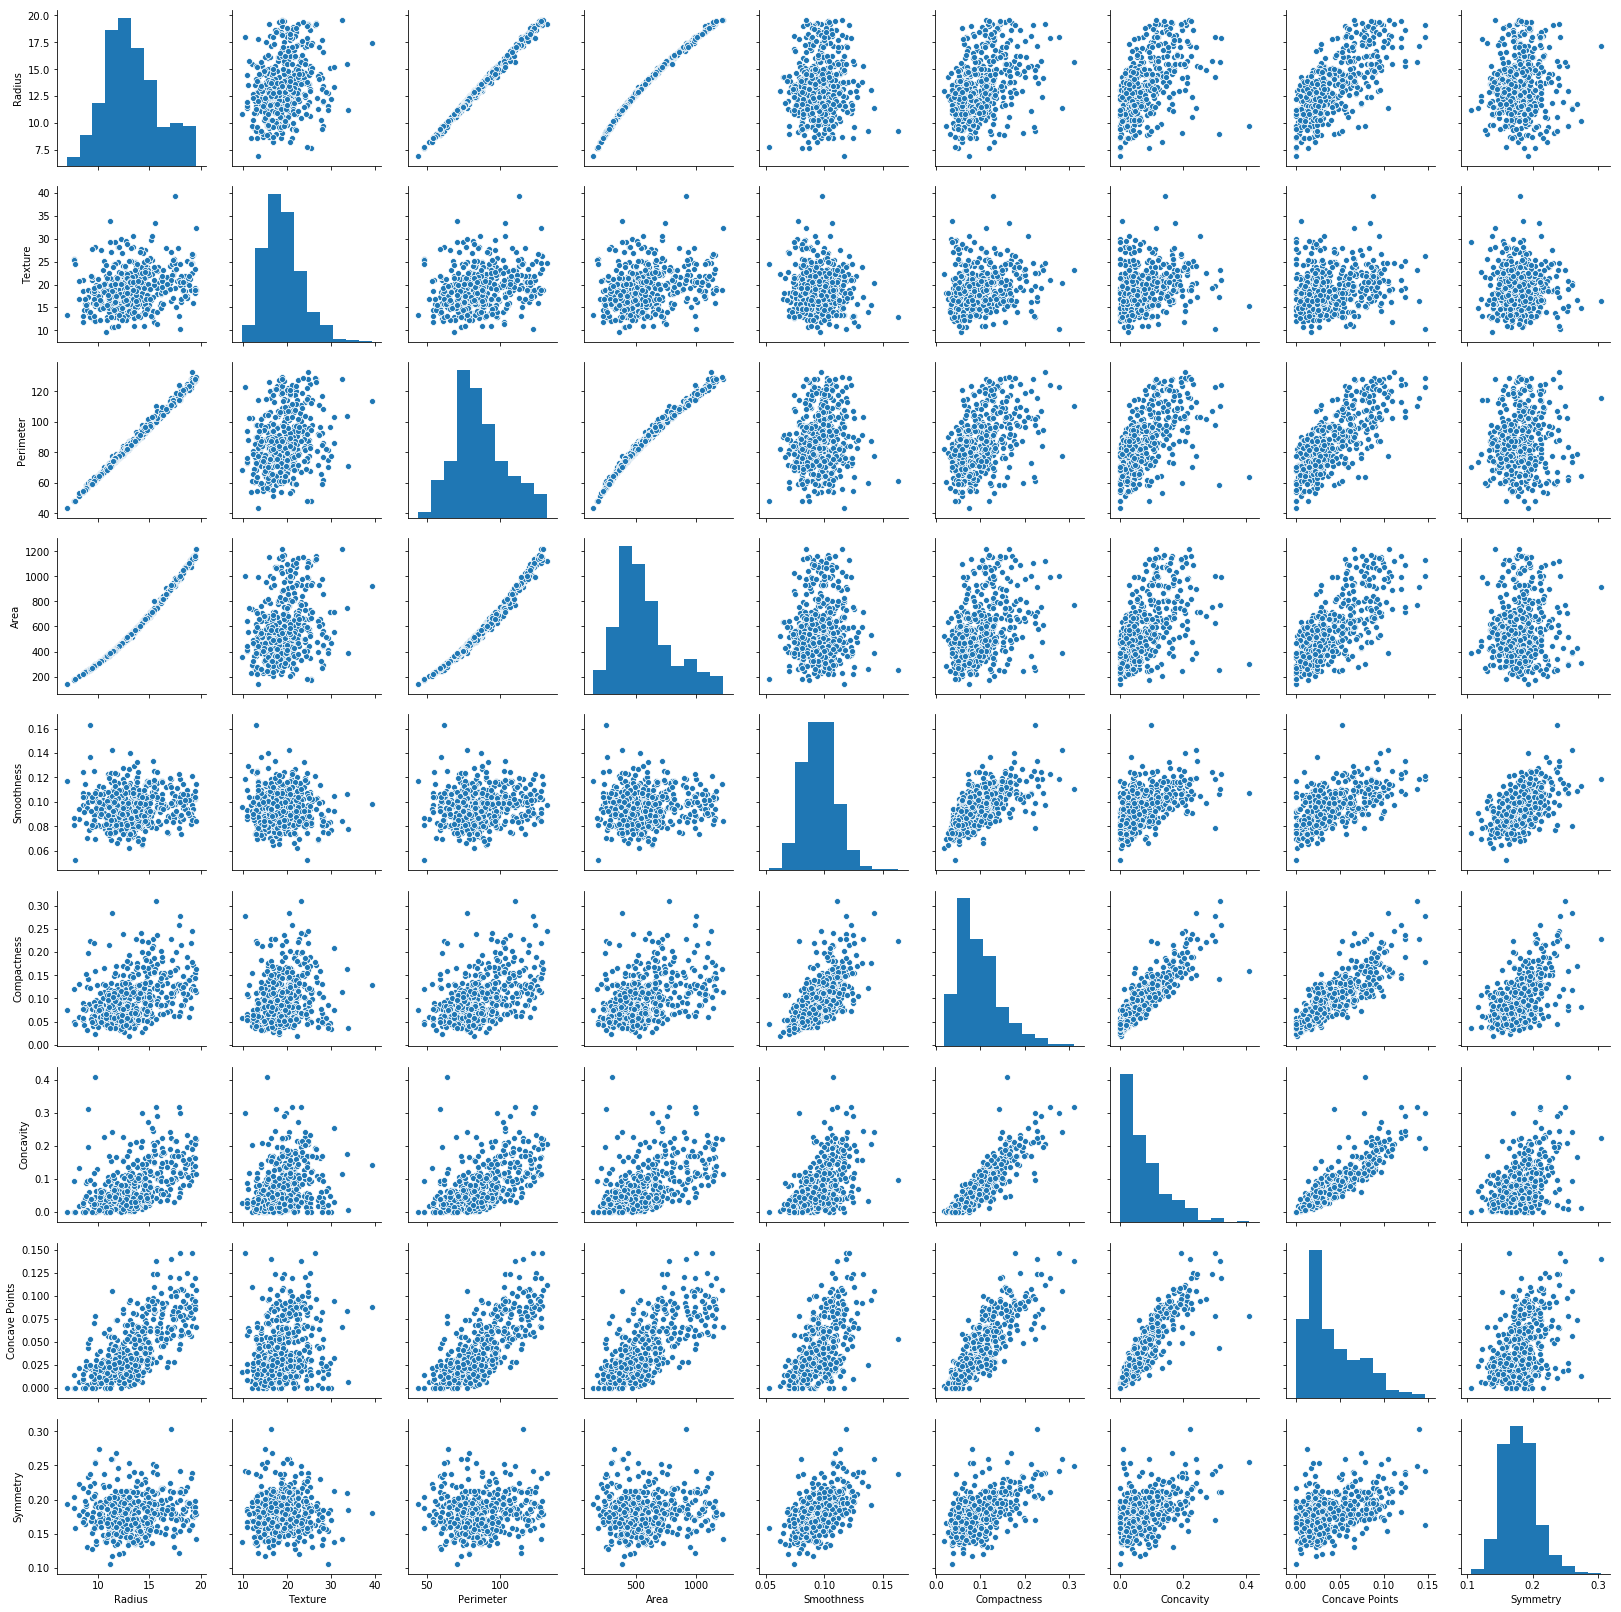

In [25]:
import seaborn as sns
sns.pairplot(data=df3_ind)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from scipy.stats import zscore

In [28]:
df3_ind_z=df3_ind.apply(zscore)

In [30]:
X=np.array(df3_ind_z)
X.shape

(513, 9)

In [38]:
y=np.array(df3_dep)
y.shape

(513,)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=1)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
NNH=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [46]:
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [49]:
predicted_labels=NNH.predict(X_test)
NNH.score(X_test,y_test)

0.9285714285714286

In [50]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[106   7]
 [  4  37]]


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

myList = list(range(1,50))

cv_scores = []
k_neighbors = []

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

0.05906906906906906

10

The optimal number of neighbors is 11


(0, 25)

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

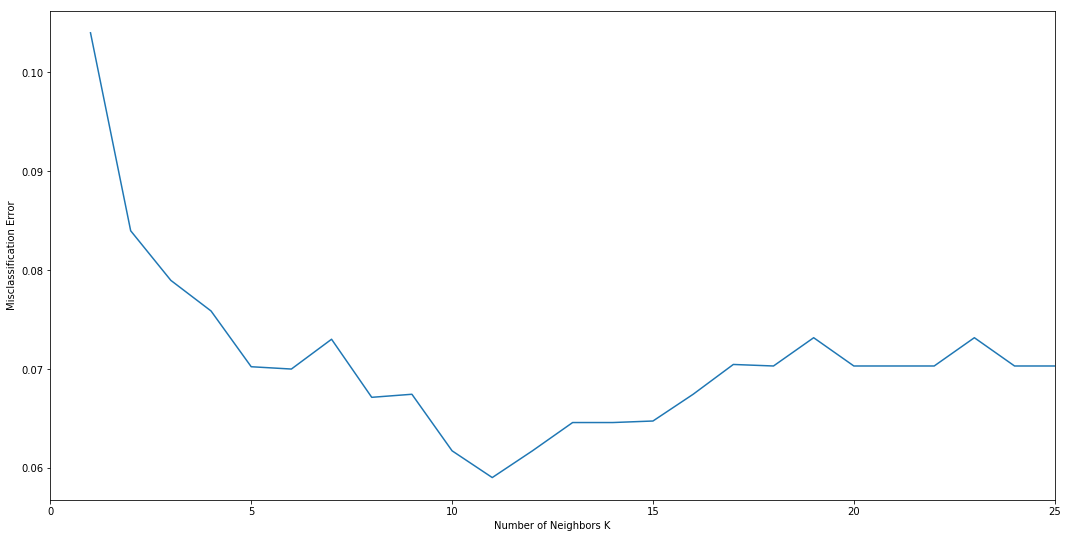

In [52]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)

plt.plot(k_neighbors, MSE)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()